In [1]:
#pip install tensorflow numpy matplotlib opencv-python scikit-learn
#pip install glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2, glob, os
import matplotlib.pyplot as plt

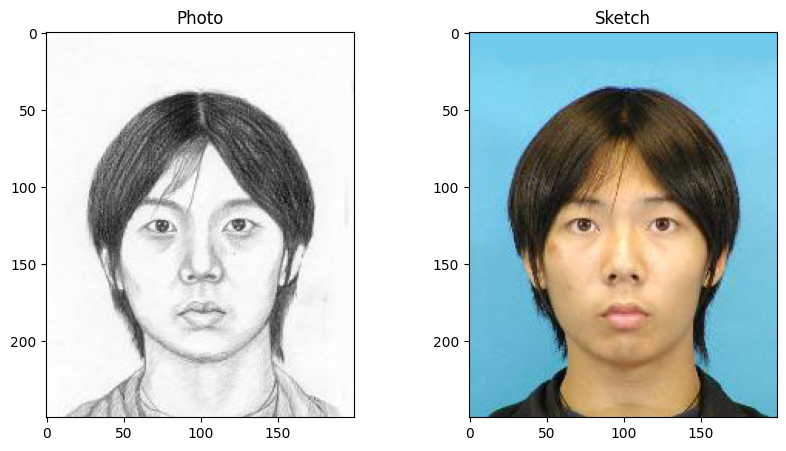

In [11]:
# Load dataset and shuffle
sketch_dir = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\CUHK\Training photo'
photo_dir = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\CUHK\Training sketch'
blue_sketch = glob.glob(os.path.join(sketch_dir, '*.jpg'))
blue_photo = glob.glob(os.path.join(photo_dir, '*.jpg'))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the photo
axes[0].imshow(cv2.cvtColor(cv2.imread(blue_photo[60]).astype('uint8'), cv2.COLOR_BGR2RGB))
axes[0].set_title('Photo')

# Display the sketch
axes[1].imshow(cv2.cvtColor(cv2.imread(blue_sketch[60]).astype('uint8'), cv2.COLOR_BGR2RGB))
axes[1].set_title('Sketch')

plt.show()

In [12]:
def random_shearing(img, num, border):
    rows = img.shape[0]
    cols = img.shape[1]
    if num == 0:
        pts1 = np.float32([[5,5],[20,5],[2,20]])
        pts2 = np.float32([[10,10],[20,5],[5,25]])
    elif num == 1:
        pts1 = np.float32([[5,5],[15,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 2:
        pts1 = np.float32([[5,5],[15,5],[5,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 3:
        pts1 = np.float32([[5,5],[10,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 4:
        pts1 = np.float32([[5,5],[10,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,30]])
    else:
        pts1 = np.float32([[5,5],[10,5],[10,20]])
        pts2 = np.float32([[5,10],[10,10],[5,30]])
    M = cv2.getAffineTransform(pts1,pts2)
    return cv2.warpAffine(img, M, (cols,rows), borderValue=border)

def random_rotation(img, degree, border):
    rows = img.shape[0]
    cols = img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),degree,1)
    return cv2.warpAffine(img,M,(cols,rows), borderValue=border)


In [13]:
def transform_image(img, skt, ang_range, shear_range, trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    # Border
    idx = 0
    border_img = tuple([int(img[idx][0][0]), int(img[idx][0][1]), int(img[idx][0][2])])
    border_skt = tuple([int(skt[0][0][0]), int(skt[0][0][1]), int(skt[0][0][2])])

    img = cv2.warpAffine(img,Rot_M,(cols,rows), borderValue=border_img)
    img = cv2.warpAffine(img,Trans_M,(cols,rows), borderValue=border_img)
    img = cv2.warpAffine(img,shear_M,(cols,rows), borderValue=border_img)

    skt = cv2.warpAffine(skt,Rot_M,(cols,rows), borderValue=border_skt)
    skt = cv2.warpAffine(skt,Trans_M,(cols,rows), borderValue=border_skt)
    skt = cv2.warpAffine(skt,shear_M,(cols,rows), borderValue=border_skt)

    return img, skt

In [14]:
sketch_dir = 'Dataset/Augmented sketch/'
photo_dir = 'Dataset/Augmented photo/'

if not os.path.exists(sketch_dir):
    os.mkdir(sketch_dir)

if not os.path.exists(photo_dir):
    os.mkdir(photo_dir)

p_filenames = glob.glob('D:\kaushik\MSC\Projects\Sketch to image\Dataset\CUHK\Training photo\*.jpg')  # Ensure correct path and extension
s_filenames = glob.glob('D:\kaushik\MSC\Projects\Sketch to image\Dataset\CUHK\Training sketch\*.jpg')  # Ensure correct path and extension

counter = 0
for i in range(len(p_filenames)):
    im = cv2.imread(p_filenames[i])
    sk = cv2.imread(s_filenames[i])

    # Check if images were loaded successfully
    if im is None:
        print(f"Error loading image: {p_filenames[i]}")
        continue
    if sk is None:
        print(f"Error loading sketch: {s_filenames[i]}")
        continue

    for j in range(50):
        img, skt = transform_image(im, sk, 40, 10, 10)

        cv2.imwrite(photo_dir + str(counter) + '.jpg', img)
        cv2.imwrite(sketch_dir + str(counter) + '.jpg', skt)

        counter += 1

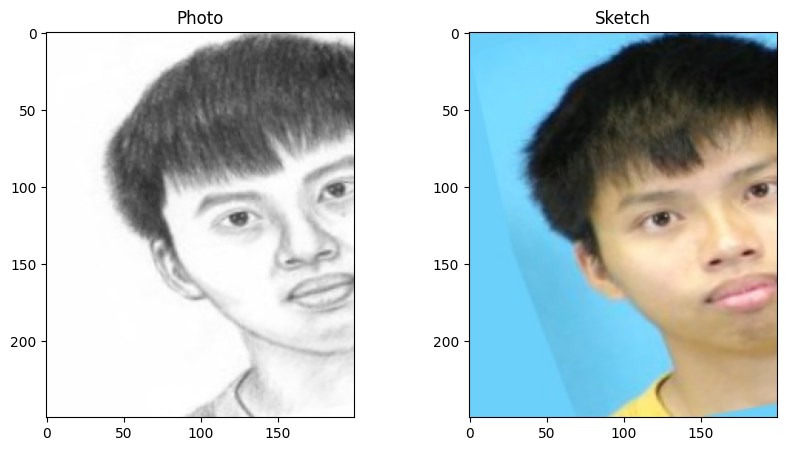

In [17]:
# Load dataset and shuffle
sketch_dir = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\Augmented photo'
photo_dir = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\Augmented sketch'
blue_sketch = glob.glob(os.path.join(sketch_dir, '*.jpg'))
blue_photo = glob.glob(os.path.join(photo_dir, '*.jpg'))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the photo
axes[0].imshow(cv2.cvtColor(cv2.imread(blue_photo[1000]).astype('uint8'), cv2.COLOR_BGR2RGB))
axes[0].set_title('Photo')

# Display the sketch
axes[1].imshow(cv2.cvtColor(cv2.imread(blue_sketch[1000]).astype('uint8'), cv2.COLOR_BGR2RGB))
axes[1].set_title('Sketch')

plt.show()

In [16]:
def count_photos(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)
    # Count files with specific extensions
    photo_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    return len(photo_files)

folder_path = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\CUHK\Training photo'
num_photos = count_photos(folder_path)
print(f'Number of photos: {num_photos}')

print("After Agumentation there should be" ,num_photos*50,"photos")

folder_path_ag = 'D:\kaushik\MSC\Projects\Sketch to image\Dataset\Augmented photo'
num_photos_ag = count_photos(folder_path_ag)
print(f'Number of Agumented photos: {num_photos_ag}')

Number of photos: 88
After Agumentation there should be 4400 photos
Number of Agumented photos: 4400
